# Layer/cell  depth  dependency:  how  neuron  properties  change  with  cell-depth/layer (that works well for passive properties and changes at whisking onset time)

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import scipy.stats
#%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
base_path = os.getcwd()
base_path = base_path.replace('notebooks', 'scripts') # note: if you have notebooks twice in your base_path, this won't work
sys.path.insert(1, base_path)

from helpers import *
from utils import remove_top_right_frame, jitter_scatterplot

# Test

In [3]:
# Make paths
path = '/Users/louiscuendet/Documents/EPFL NEURO-X/Semestre Automne 2025/Neuroscience/BIO482_MiniProject_2025_Python/Data/Data_bio482.pkl' # EDIT the path !!!!!!!
data_df = pd.read_pickle(path)

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
data_df.head(5)

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,Mouse_Genotype,Mouse_Name,Mouse_Sex,Sweep_ActiveContactTimes,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,C57Bl6j,SC901,m,"[[6.009, 6.023000000000001], [6.029, 6.091], [...",1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...","[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,C57Bl6j,SC901,m,"[[6.792999999999999, 6.859000000000002], [6.91...",2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[15.274999999999999, 15.375], [16.247, 16.643...","[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,C57Bl6j,SC901,m,nan,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[4.347000000000001, 7.0390000000000015], [8.2...","[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,C57Bl6j,SC901,m,"[[3.831000000000003, 3.8430000000000035], [3.9...",4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,nan,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,C57Bl6j,SC901,m,"[[11.745000000000005, 11.751000000000005], [11...",5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[4.411000000000001, 4.4809999999999945], [5.2...","[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."


In [20]:
data_df.columns

Index(['Cell_APThreshold_Slope', 'Cell_Anatomy', 'Cell_Counter', 'Cell_Depth',
       'Cell_ID', 'Cell_Layer', 'Cell_TargetedBrainArea', 'Cell_Type',
       'Cell_tdTomatoExpressing', 'Mouse_DateOfBirth', 'Mouse_Genotype',
       'Mouse_Name', 'Mouse_Sex', 'Sweep_ActiveContactTimes', 'Sweep_Counter',
       'Sweep_MembranePotential', 'Sweep_MembranePotential_SamplingRate',
       'Sweep_PassiveContactTimes', 'Sweep_QuietTimes', 'Sweep_StartTime',
       'Sweep_Type', 'Sweep_WhiskerAngle', 'Sweep_WhiskerAngle_SamplingRate',
       'Sweep_WhiskingTimes'],
      dtype='object')

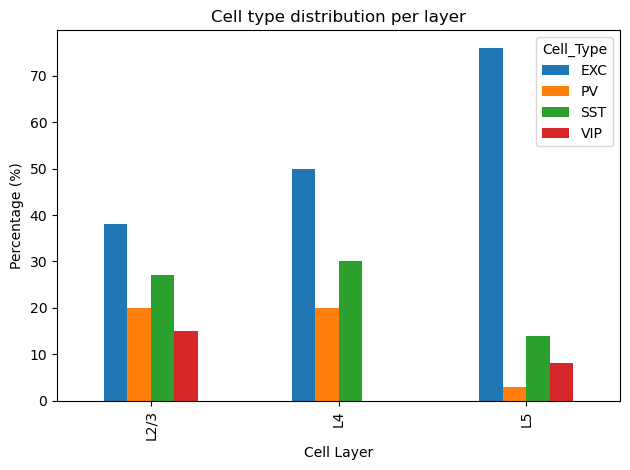

In [19]:
percent_df = (round(data_df.groupby(['Cell_Layer','Cell_Type']).size()/data_df.groupby('Cell_Layer').size(), ndigits=2) * 100).unstack()

percent_df.plot(kind='bar')
plt.ylabel('Percentage (%)')
plt.xlabel('Cell Layer')
plt.title('Cell type distribution per layer')
plt.tight_layout()
plt.show()


/Users/louiscuendet/Documents/EPFL NEURO-X/Semestre Automne 2025/Neuroscience/BIO482_MiniProject_2025_Python/scripts/helpers.py:55: RuntimeWarning: invalid value encountered in divide
  sAP_OnOff = np.diff(np.divide(sAP_Seg, np.abs(sAP_Seg)))  # compute the binary signal
/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/4256319643.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=order, showfliers=False)


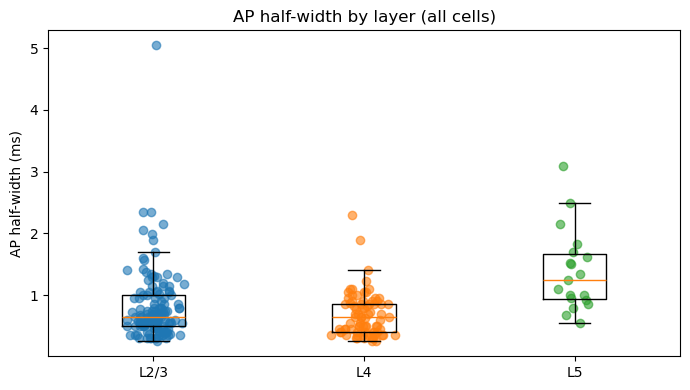

/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/4256319643.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=order, showfliers=False)


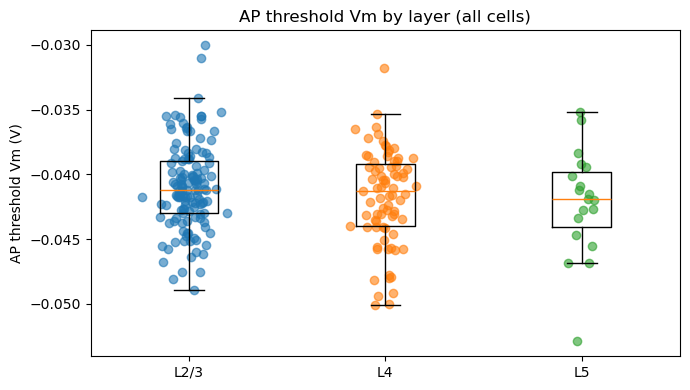

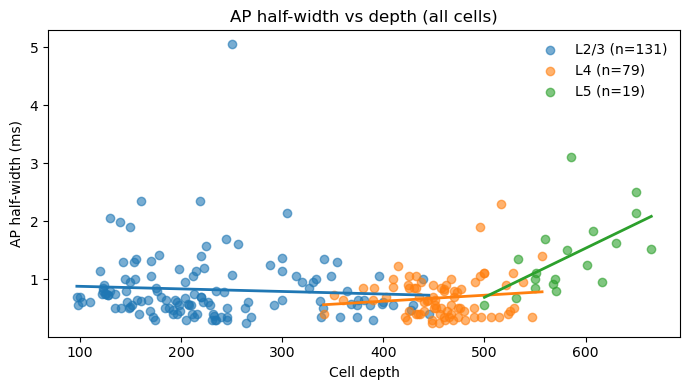

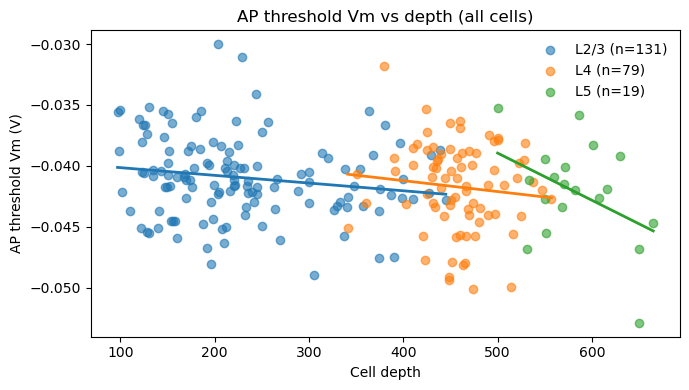

/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/4256319643.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=order, showfliers=False)


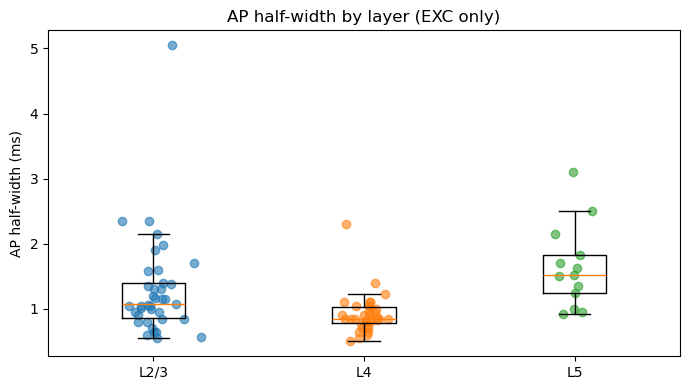

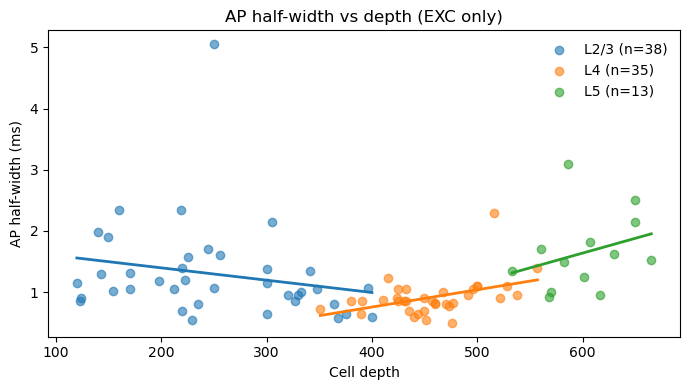

/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/4256319643.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=order, showfliers=False)


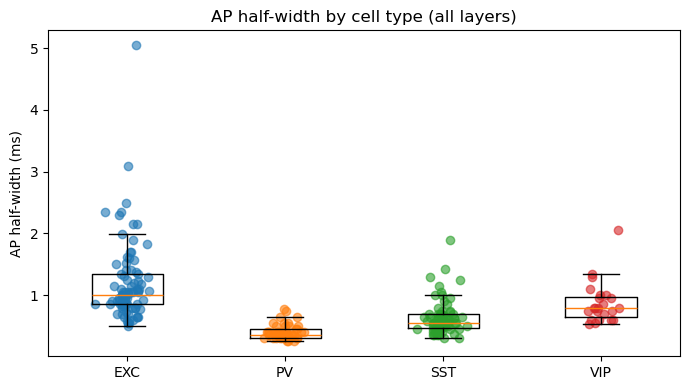

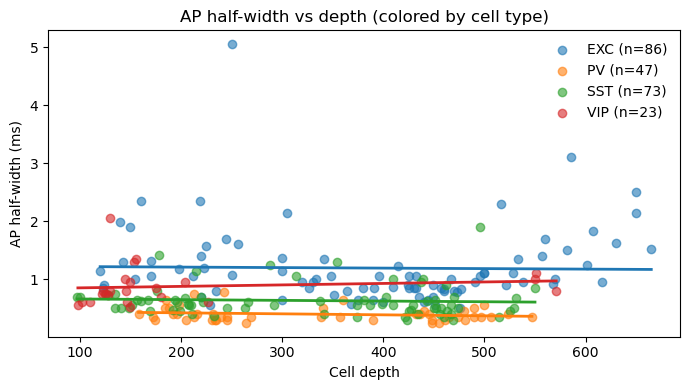


--- n cells per layer ---
Cell_Layer
L2/3    133
L4       79
L5       19
Name: Cell_ID, dtype: int64

--- n cells per type ---
Cell_Type
EXC    86
PV     49
SST    73
VIP    23
Name: Cell_ID, dtype: int64

--- Median intrinsic properties by layer ---
            AP_Width  AP_ThrVm  Vm_baseline_mean
Cell_Layer                                      
L2/3            0.65 -0.041180               NaN
L4              0.65 -0.041310               NaN
L5              1.25 -0.041921               NaN

--- Median intrinsic properties by type ---
           AP_Width  AP_ThrVm  Vm_baseline_mean
Cell_Type                                      
EXC         1.00625 -0.040601               NaN
PV          0.35000 -0.042178               NaN
SST         0.55000 -0.042105               NaN
VIP         0.80000 -0.039773               NaN


In [90]:
# ============================================================
# FULL PIPELINE — INTRINSIC LAMINAR + DEPTH + CELL-TYPE ANALYSIS
# Using AP waveform metrics (threshold Vm, half-width, amplitude)
#
# Requirements:
# numpy, pandas, matplotlib
# scipy.signal.find_peaks (already needed by your AP detector)
#
# Assumes availability of:
# Function_Detect_APs(MembranePotential, SR_Vm, Vm_Deriv_Thrs)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# 0) Helper functions
# ============================================================

def safe_mean(x):
    if isinstance(x, (list, np.ndarray)):
        x = np.asarray(x, dtype=float)
        return float(np.mean(x)) if len(x) > 0 else np.nan
    return np.nan

def safe_std(x):
    if isinstance(x, (list, np.ndarray)):
        x = np.asarray(x, dtype=float)
        return float(np.std(x)) if len(x) > 0 else np.nan
    return np.nan

def linregress_simple(x, y):
    x = np.asarray(x, float)
    y = np.asarray(y, float)
    m = np.isfinite(x) & np.isfinite(y)
    x = x[m]; y = y[m]
    n = len(x)
    if n < 3:
        return np.nan, np.nan, np.nan, n
    x0 = x.mean()
    y0 = y.mean()
    ssx = np.sum((x - x0)**2)
    slope = np.sum((x - x0)*(y - y0)) / ssx
    r = np.corrcoef(x, y)[0,1]
    return slope, r, n

def box_jitter(df, metric, group, order, title, ylabel):
    tmp = df[df[group].isin(order)].dropna(subset=[metric, group])
    if len(tmp) == 0:
        return
    data = [tmp[tmp[group] == g][metric].values for g in order]

    plt.figure(figsize=(7,4))
    plt.boxplot(data, labels=order, showfliers=False)
    for i, g in enumerate(order):
        y = tmp[tmp[group] == g][metric].values
        x = np.random.normal(i+1, 0.06, size=len(y))
        plt.scatter(x, y, alpha=0.6)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def scatter_depth(df, metric, hue, order, title, ylabel):
    plt.figure(figsize=(7,4))
    for h in order:
        sub = df[df[hue] == h].dropna(subset=['Cell_Depth', metric])
        if len(sub) == 0:
            continue
        plt.scatter(sub['Cell_Depth'], sub[metric], alpha=0.6, label=f"{h} (n={len(sub)})")
        if len(sub) >= 6:
            slope, r, n = linregress_simple(sub['Cell_Depth'], sub[metric])
            if np.isfinite(slope):
                xx = np.linspace(sub['Cell_Depth'].min(), sub['Cell_Depth'].max(), 100)
                plt.plot(xx, slope*xx + np.mean(sub[metric] - slope*sub['Cell_Depth']), lw=2)
    plt.xlabel("Cell depth")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()

# ============================================================
# 1) Extract AP waveform metrics per sweep
# ============================================================

df = data_df.copy()

AP_THRESHOLD_DERIV = 10  # <-- keep consistent with your original usage

ap_metrics = []

for idx, row in df.iterrows():
    Vm = row['Sweep_MembranePotential']
    SR = row['Sweep_MembranePotential_SamplingRate']

    if not isinstance(Vm, (list, np.ndarray)):
        ap_metrics.append((np.nan, np.nan, np.nan, 0))
        continue

    APs = Function_Detect_APs(Vm, SR, AP_THRESHOLD_DERIV)

    if APs is None or len(APs) == 0:
        ap_metrics.append((np.nan, np.nan, np.nan, 0))
        continue

    APs = np.asarray(APs)

    thr_vm = np.median(APs[:,1])      # AP threshold Vm
    amp    = np.median(APs[:,4])      # AP amplitude
    width  = np.median(APs[:,5])      # AP half-width (ms)
    n_ap   = APs.shape[0]

    ap_metrics.append((thr_vm, amp, width, n_ap))

df[['Sweep_APThrVm','Sweep_APAmp','Sweep_APWidth','Sweep_nAP']] = pd.DataFrame(
    ap_metrics, index=df.index
)

# ============================================================
# 2) Collapse sweep-level → cell-level
# ============================================================

cells = (
    df.groupby('Cell_ID', as_index=False)
      .agg(
          Cell_Layer=('Cell_Layer','first'),
          Cell_Type=('Cell_Type','first'),
          Cell_Depth=('Cell_Depth','first'),
          AP_ThrVm=('Sweep_APThrVm','median'),
          AP_Amp=('Sweep_APAmp','median'),
          AP_Width=('Sweep_APWidth','median'),
          n_APs=('Sweep_nAP','sum'),
          Vm_baseline_mean=('Sweep_MembranePotential', safe_mean),
          Vm_baseline_std=('Sweep_MembranePotential', safe_std),
          Mouse_Name=('Mouse_Name','first')
      )
)

# Minimum spikes per cell (important!)
cells = cells[cells['n_APs'] >= 10]

# Orders
layer_order = ['L2/3','L4','L5']
type_order  = ['EXC','PV','SST','VIP']

# ============================================================
# 3) ALL CELLS — layer-wise intrinsic properties
# ============================================================

box_jitter(cells, 'AP_Width', 'Cell_Layer', layer_order,
           "AP half-width by layer (all cells)", "AP half-width (ms)")

box_jitter(cells, 'AP_ThrVm', 'Cell_Layer', layer_order,
           "AP threshold Vm by layer (all cells)", "AP threshold Vm (V)")

box_jitter(cells, 'Vm_baseline_mean', 'Cell_Layer', layer_order,
           "Baseline Vm by layer (all cells)", "Baseline Vm (V)")

# ============================================================
# 4) ALL CELLS — depth gradients
# ============================================================

scatter_depth(cells, 'AP_Width', 'Cell_Layer', layer_order,
              "AP half-width vs depth (all cells)", "AP half-width (ms)")

scatter_depth(cells, 'AP_ThrVm', 'Cell_Layer', layer_order,
              "AP threshold Vm vs depth (all cells)", "AP threshold Vm (V)")

# ============================================================
# 5) EXC ONLY — laminar + depth structure
# ============================================================

cells_exc = cells[cells['Cell_Type'] == 'EXC']

box_jitter(cells_exc, 'AP_Width', 'Cell_Layer', layer_order,
           "AP half-width by layer (EXC only)", "AP half-width (ms)")

scatter_depth(cells_exc, 'AP_Width', 'Cell_Layer', layer_order,
              "AP half-width vs depth (EXC only)", "AP half-width (ms)")

# ============================================================
# 6) CELL TYPE — across layers
# ============================================================

box_jitter(cells, 'AP_Width', 'Cell_Type', type_order,
           "AP half-width by cell type (all layers)", "AP half-width (ms)")

scatter_depth(cells, 'AP_Width', 'Cell_Type', type_order,
              "AP half-width vs depth (colored by cell type)", "AP half-width (ms)")

# ============================================================
# 7) Summary tables (for report)
# ============================================================

print("\n--- n cells per layer ---")
print(cells.groupby('Cell_Layer')['Cell_ID'].count())

print("\n--- n cells per type ---")
print(cells.groupby('Cell_Type')['Cell_ID'].count())

print("\n--- Median intrinsic properties by layer ---")
print(
    cells.groupby('Cell_Layer')[['AP_Width','AP_ThrVm','Vm_baseline_mean']]
    .median()
)

print("\n--- Median intrinsic properties by type ---")
print(
    cells.groupby('Cell_Type')[['AP_Width','AP_ThrVm','Vm_baseline_mean']]
    .median()
)


n sweeps: 831
n unique cells: 240
n cells with core intrinsic metrics: 240

Counts by layer:
 Cell_Layer
L2/3    141
L4       79
L5       20
Name: count, dtype: int64

Counts by type:
 Cell_Type
EXC    93
SST    73
PV     49
VIP    25
Name: count, dtype: int64

Data completeness (fraction NaN):
Cell_APThreshold_Slope    0.000000
Vm_baseline_mean          0.000000
Vm_baseline_std           0.000000
Cell_Depth                0.008333
dtype: float64


/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/3809159165.py:170: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by, labels=order, showfliers=False)


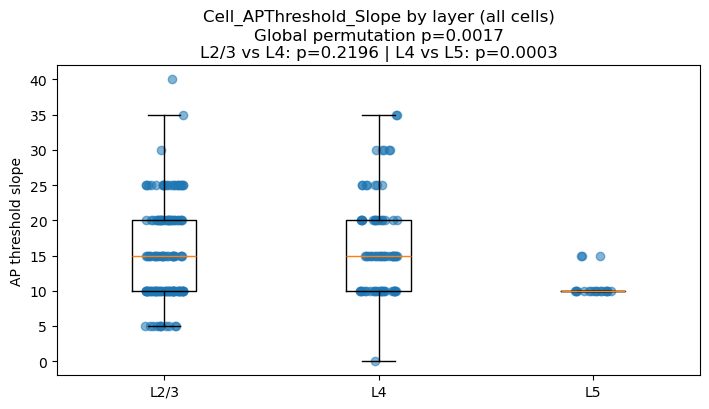

/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/3809159165.py:170: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by, labels=order, showfliers=False)


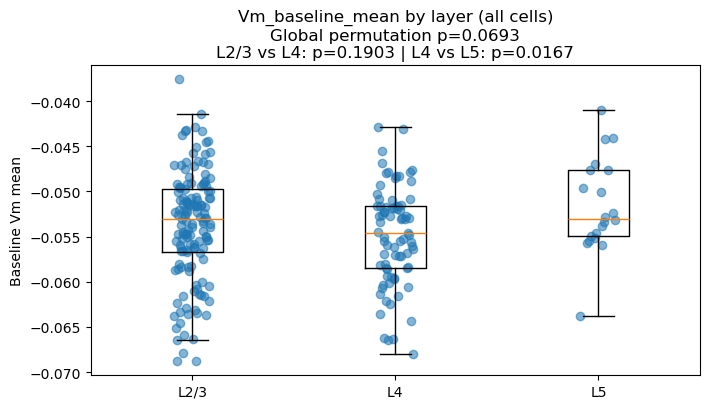

/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/3809159165.py:170: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by, labels=order, showfliers=False)


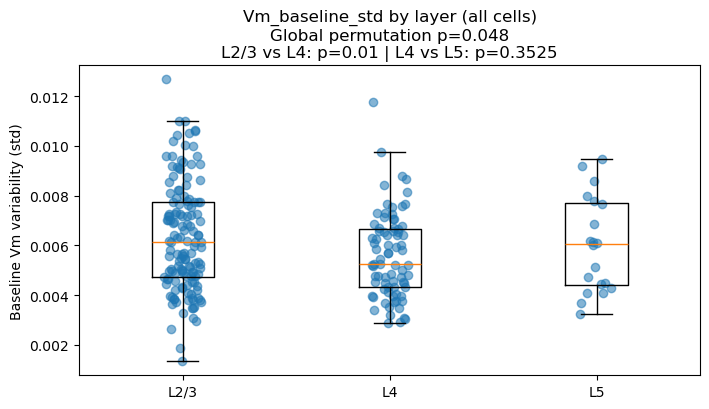

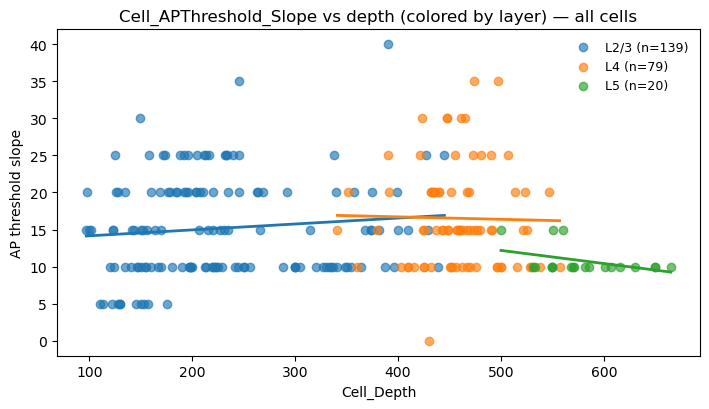


Depth slopes for Cell_APThreshold_Slope grouped by Cell_Layer
  L2/3: n=139, slope=0.007975, r=0.105, p~0.2176
  L4: n=79, slope=-0.003302, r=-0.0206, p~0.8565
  L5: n=20, slope=-0.01772, r=-0.429, p~NA


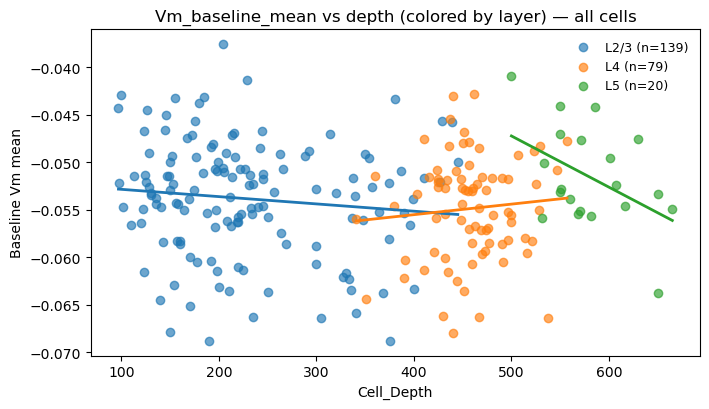


Depth slopes for Vm_baseline_mean grouped by Cell_Layer
  L2/3: n=139, slope=-7.67e-06, r=-0.111, p~0.1925
  L4: n=79, slope=1.109e-05, r=0.0875, p~0.4407
  L5: n=20, slope=-5.388e-05, r=-0.454, p~NA


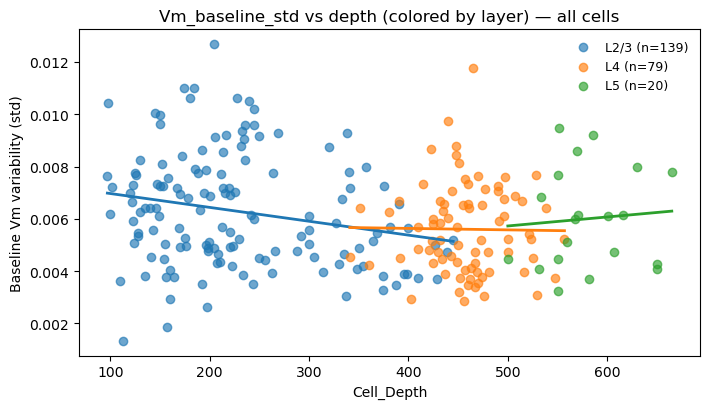


Depth slopes for Vm_baseline_std grouped by Cell_Layer
  L2/3: n=139, slope=-5.301e-06, r=-0.216, p~0.0098
  L4: n=79, slope=-5.608e-07, r=-0.014, p~0.9022
  L5: n=20, slope=3.439e-06, r=0.0793, p~NA

================ EXC ONLY ================
n EXC cells with core metrics: 93
Counts by layer (EXC):
 Cell_Layer
L2/3    44
L4      35
L5      14
Name: count, dtype: int64


/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/3809159165.py:170: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by, labels=order, showfliers=False)


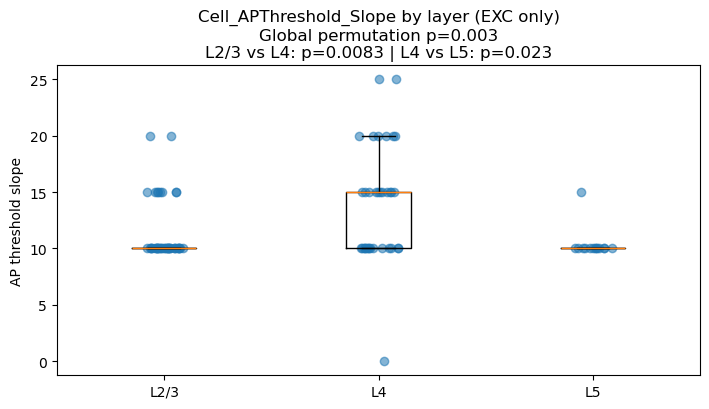

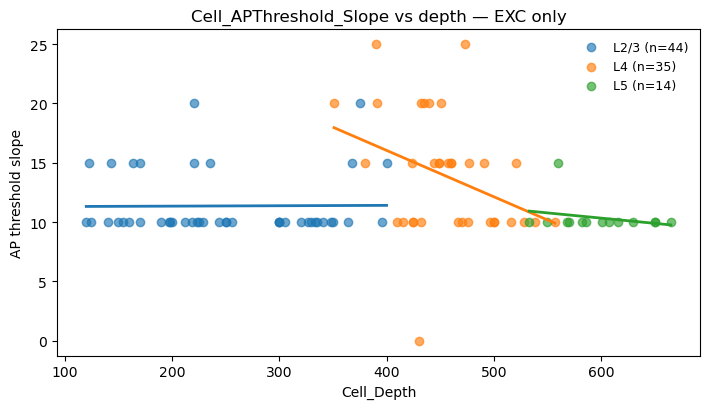


Depth slopes for Cell_APThreshold_Slope grouped by Cell_Layer
  L2/3: n=44, slope=0.0003232, r=0.00982, p~0.9492
  L4: n=35, slope=-0.03909, r=-0.351, p~0.0311
  L5: n=14, slope=-0.008816, r=-0.268, p~NA


/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/3809159165.py:170: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by, labels=order, showfliers=False)


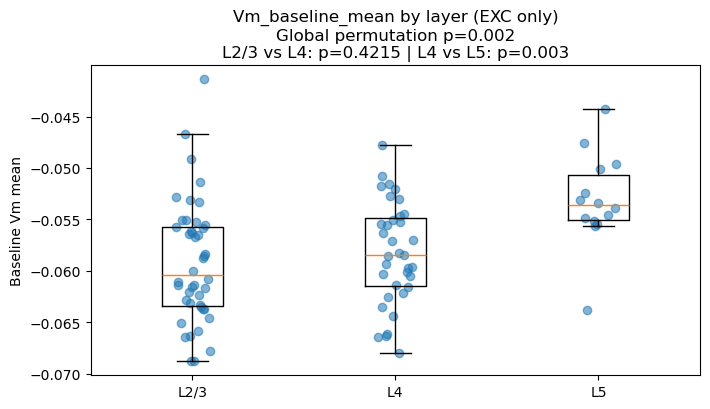

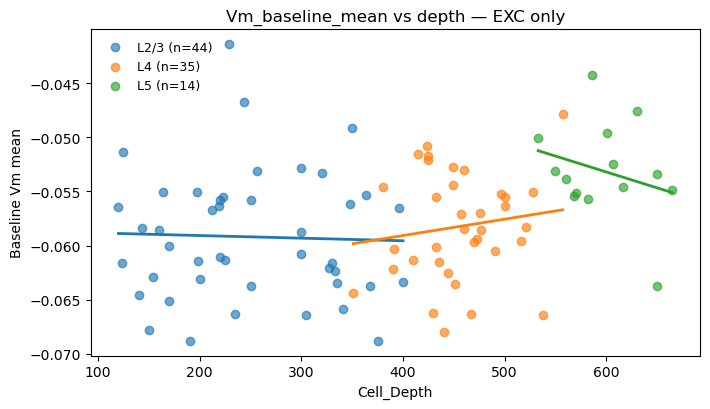


Depth slopes for Vm_baseline_mean grouped by Cell_Layer
  L2/3: n=44, slope=-2.402e-06, r=-0.0337, p~0.8271
  L4: n=35, slope=1.515e-05, r=0.141, p~0.4139
  L5: n=14, slope=-2.938e-05, r=-0.263, p~NA


/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/3809159165.py:170: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by, labels=order, showfliers=False)


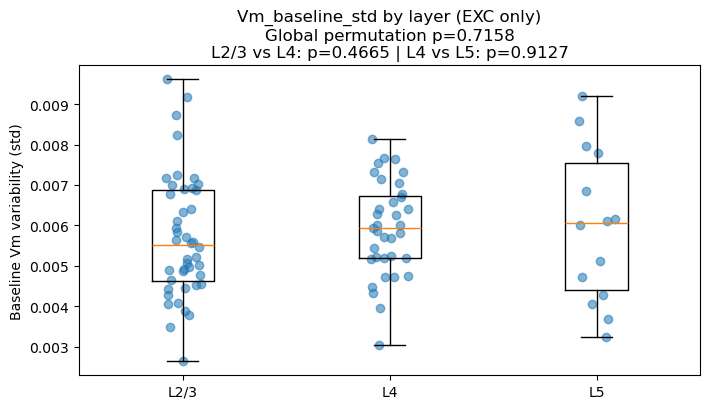

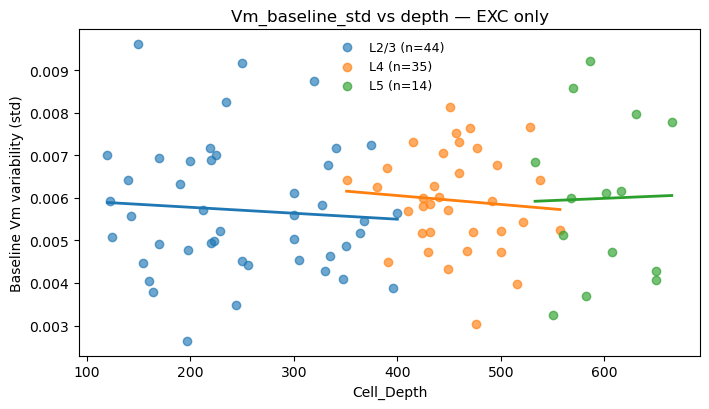


Depth slopes for Vm_baseline_std grouped by Cell_Layer
  L2/3: n=44, slope=-1.4e-06, r=-0.0759, p~0.622
  L4: n=35, slope=-2.088e-06, r=-0.0827, p~0.6335
  L5: n=14, slope=1.027e-06, r=0.022, p~NA

================ Layer × Type heatmaps ================


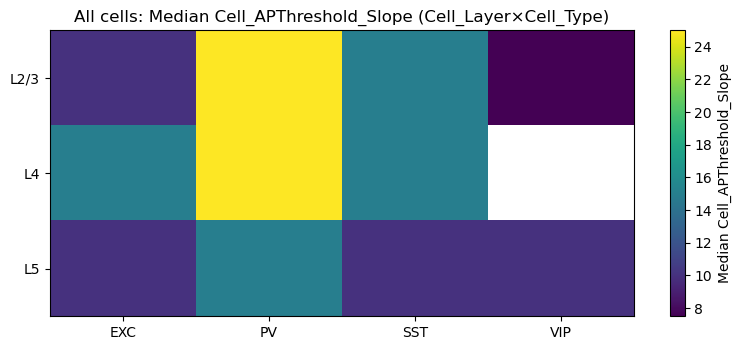

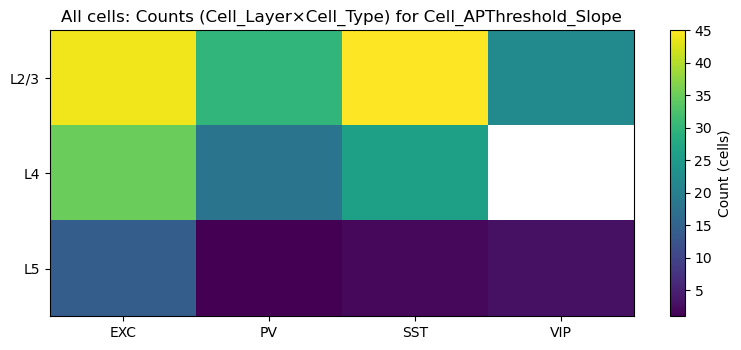

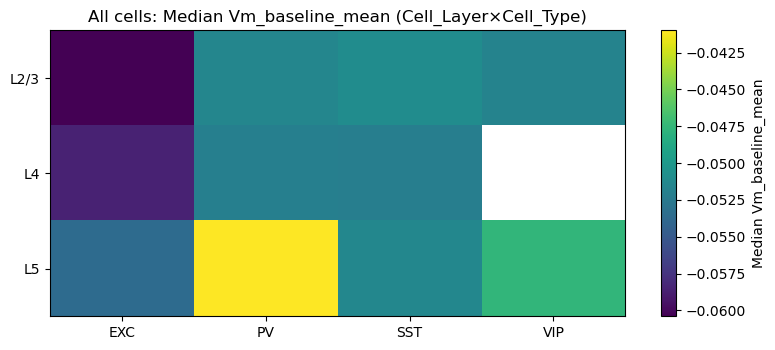

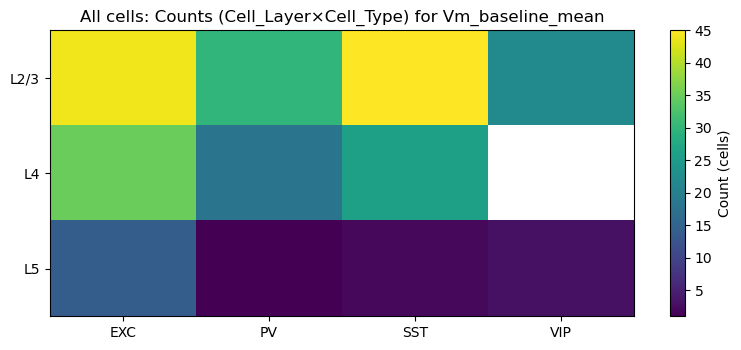

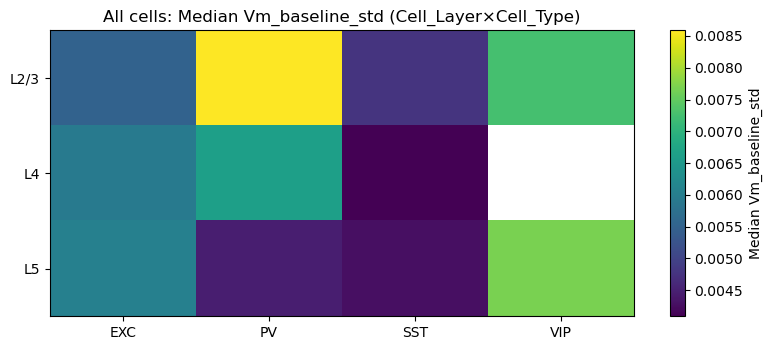

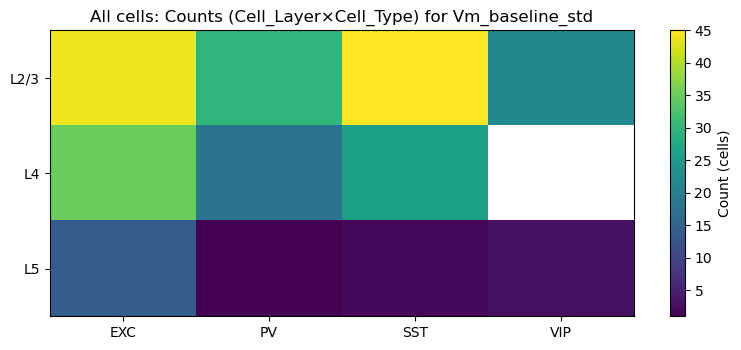


================ Inhibitory-only (PV/SST/VIP) ================


/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/3809159165.py:170: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by, labels=order, showfliers=False)


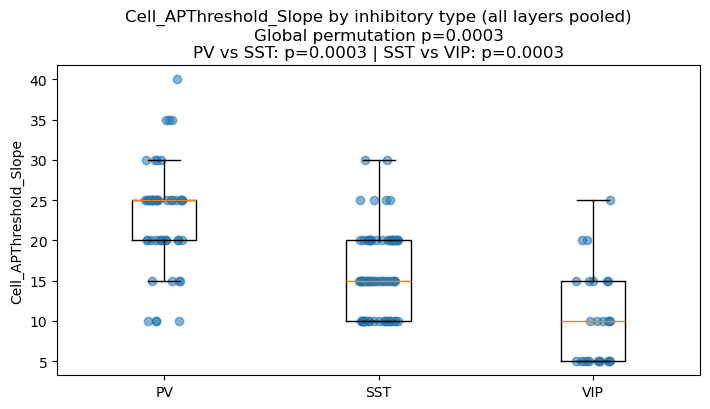

/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/3809159165.py:170: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by, labels=order, showfliers=False)


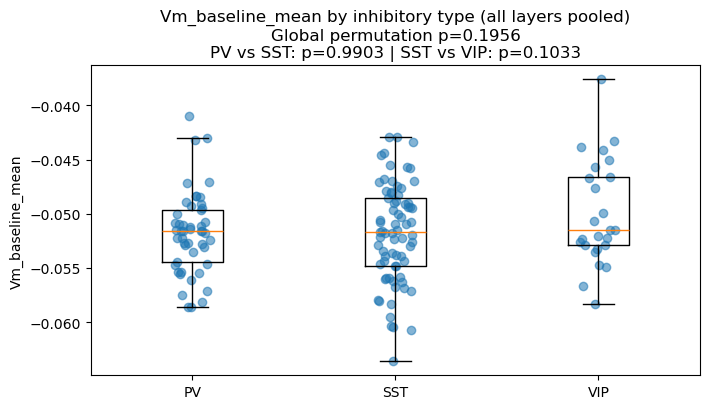

/var/folders/qs/j41g8rr52rvg0m9rwr3pm6_w0000gn/T/ipykernel_72185/3809159165.py:170: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by, labels=order, showfliers=False)


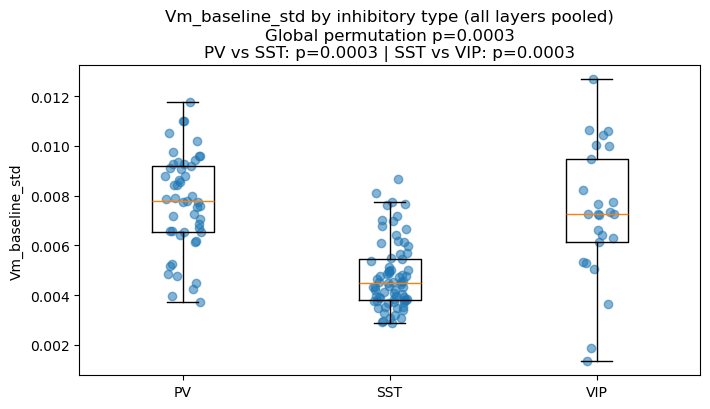


================ Depth gradients within each cell type ================


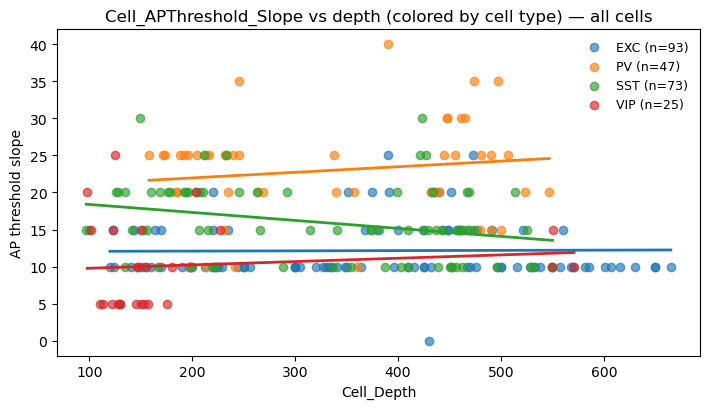


Depth slopes for Cell_APThreshold_Slope grouped by Cell_Type
  EXC: n=93, slope=0.000321, r=0.0121, p~0.9084
  PV: n=47, slope=0.00757, r=0.145, p~0.325
  SST: n=73, slope=-0.01078, r=-0.289, p~0.0111
  VIP: n=25, slope=0.004503, r=0.108, p~NA


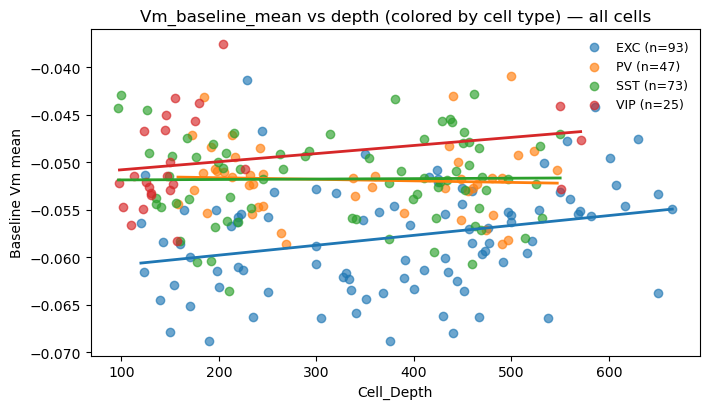


Depth slopes for Vm_baseline_mean grouped by Cell_Type
  EXC: n=93, slope=1.042e-05, r=0.269, p~0.0077
  PV: n=47, slope=-1.633e-06, r=-0.0544, p~0.7145
  SST: n=73, slope=4.472e-07, r=0.0132, p~0.9114
  VIP: n=25, slope=8.528e-06, r=0.246, p~NA


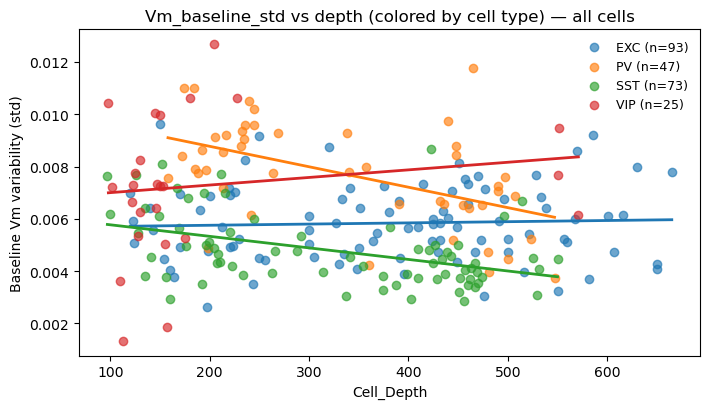


Depth slopes for Vm_baseline_std grouped by Cell_Type
  EXC: n=93, slope=4.554e-07, r=0.0462, p~0.6591
  PV: n=47, slope=-7.815e-06, r=-0.509, p~7.3e-05
  SST: n=73, slope=-4.414e-06, r=-0.439, p~3.9e-05
  VIP: n=25, slope=2.902e-06, r=0.15, p~NA

================ Optional linear models (statsmodels) ================
statsmodels not available or failed to import/run.
Reason: ModuleNotFoundError("No module named 'statsmodels'")

================ Summary tables ================

--- n cells per layer ---
Cell_Layer
L2/3    141
L4       79
L5       20
Name: Cell_ID, dtype: int64

--- n cells per type ---
Cell_Type
EXC    93
PV     49
SST    73
VIP    25
Name: Cell_ID, dtype: int64

--- Medians by layer ---
            Cell_APThreshold_Slope  Vm_baseline_mean  Vm_baseline_std
Cell_Layer                                                           
L2/3                          15.0         -0.053106         0.006117
L4                            15.0         -0.054634         0.005242
L5    

In [91]:
# ============================================================
# FULL PIPELINE: Layer + Depth + Cell-Type analysis (cell-level)
# - Build cell-level table from sweep-level df
# - Intrinsic metrics: AP threshold slope, baseline Vm mean, baseline Vm variability
# - Analyses:
#   (1) Layer-wise differences (all cells)
#   (2) Depth gradients (all cells)
#   (3) Depth within each layer (all cells)
#   (4) Repeat (1)-(3) for EXC-only
#   (5) Layer × cell-type summaries (heatmaps + counts)
#   (6) Depth gradients within each cell type (slopes + plots)
#   (7) Optional linear models: depth + layer + type + interactions (statsmodels)
#
# Requirements: numpy, pandas, matplotlib (statsmodels optional)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 0) Helpers
# ----------------------------
def safe_mean(x):
    if isinstance(x, (list, np.ndarray)):
        x = np.asarray(x, dtype=float)
        return float(np.mean(x)) if x.size > 0 else np.nan
    return np.nan

def safe_std(x):
    if isinstance(x, (list, np.ndarray)):
        x = np.asarray(x, dtype=float)
        return float(np.std(x)) if x.size > 0 else np.nan
    return np.nan

def format_p(p):
    if p != p or p is None:
        return "NA"
    if p < 1e-4:
        return f"{p:.1e}"
    return f"{p:.4f}".rstrip("0").rstrip(".")

def permutation_test_groups(values, groups, n_perm=5000, seed=0):
    """
    Nonparametric test for difference across >=2 groups.
    Statistic: between-group sum of squares (ANOVA-like).
    """
    rng = np.random.default_rng(seed)
    values = np.asarray(values, float)
    groups = np.asarray(groups)

    mask = np.isfinite(values) & pd.notna(groups)
    values = values[mask]
    groups = groups[mask]

    uniq = pd.unique(groups)
    if len(uniq) < 2:
        return np.nan

    grand = values.mean()
    ss_between = 0.0
    for g in uniq:
        vg = values[groups == g]
        ss_between += len(vg) * (vg.mean() - grand) ** 2

    count = 0
    for _ in range(n_perm):
        perm_groups = rng.permutation(groups)
        grand_p = values.mean()
        ss_p = 0.0
        for g in uniq:
            vg = values[perm_groups == g]
            ss_p += len(vg) * (vg.mean() - grand_p) ** 2
        if ss_p >= ss_between:
            count += 1

    return (count + 1) / (n_perm + 1)

def permutation_test_pair(values, groups, g1, g2, n_perm=5000, seed=0):
    """
    Pairwise permutation test between two groups.
    Statistic: |mean(g1) - mean(g2)|
    """
    rng = np.random.default_rng(seed)
    values = np.asarray(values, float)
    groups = np.asarray(groups)

    mask = np.isfinite(values) & pd.notna(groups)
    values = values[mask]
    groups = groups[mask]

    v1 = values[groups == g1]
    v2 = values[groups == g2]
    if len(v1) < 2 or len(v2) < 2:
        return np.nan

    obs = abs(v1.mean() - v2.mean())
    pooled = np.concatenate([v1, v2])
    n1 = len(v1)

    count = 0
    for _ in range(n_perm):
        perm = rng.permutation(pooled)
        d = abs(perm[:n1].mean() - perm[n1:].mean())
        if d >= obs:
            count += 1
    return (count + 1) / (n_perm + 1)

def linregress_simple(x, y):
    """Return slope, intercept, r, p (approx), n. p computed via t-test (approx) if n>=3."""
    x = np.asarray(x, float)
    y = np.asarray(y, float)
    m = np.isfinite(x) & np.isfinite(y)
    x = x[m]; y = y[m]
    n = len(x)
    if n < 2:
        return np.nan, np.nan, np.nan, np.nan, n
    x_mean = x.mean()
    y_mean = y.mean()
    ssx = np.sum((x - x_mean)**2)
    if ssx == 0:
        return np.nan, np.nan, np.nan, np.nan, n
    slope = np.sum((x - x_mean)*(y - y_mean)) / ssx
    intercept = y_mean - slope*x_mean
    # r
    ssy = np.sum((y - y_mean)**2)
    if ssy == 0:
        r = np.nan
    else:
        r = np.sum((x - x_mean)*(y - y_mean)) / np.sqrt(ssx*ssy)
    # p-value approx via t distribution (no scipy; use normal approx for n>=30 else fallback NA)
    p = np.nan
    if n >= 3 and np.isfinite(r):
        # t = r*sqrt((n-2)/(1-r^2))
        denom = max(1e-12, (1 - r*r))
        t = r*np.sqrt((n-2)/denom)
        # normal approx for |t| (ok-ish; if you want exact, install scipy)
        if n >= 30:
            # two-sided
            from math import erf, sqrt
            z = abs(t)
            p = 2*(1 - 0.5*(1 + erf(z/np.sqrt(2))))
        else:
            p = np.nan
    return slope, intercept, r, p, n

def box_jitter_by_group(df_cells, metric, group_col, order, title, ylabel,
                        n_perm=3000, seed=0, jitter=0.18, alpha=0.55):
    tmp = df_cells[df_cells[group_col].isin(order)].dropna(subset=[metric, group_col]).copy()
    if len(tmp) == 0:
        print(f"⚠️ No data for {metric} by {group_col}")
        return

    data_by = [tmp.loc[tmp[group_col]==g, metric].values for g in order]

    p_global = permutation_test_groups(tmp[metric].values, tmp[group_col].values, n_perm=n_perm, seed=seed)

    # pairwise adjacent p-values (optional)
    pair_text = ""
    if len(order) >= 2:
        pairs = [(order[i], order[i+1]) for i in range(len(order)-1)]
        p_pairs = []
        for i,(a,b) in enumerate(pairs):
            p = permutation_test_pair(tmp[metric].values, tmp[group_col].values, a, b,
                                      n_perm=n_perm, seed=seed+1+i)
            p_pairs.append((a,b,p))
        pair_text = " | ".join([f"{a} vs {b}: p={format_p(p)}" for a,b,p in p_pairs])

    plt.figure(figsize=(7.2, 4.2))
    plt.boxplot(data_by, labels=order, showfliers=False)

    # jittered points
    g_to_x = {g:i+1 for i,g in enumerate(order)}  # box positions are 1..K
    xs = tmp[group_col].map(g_to_x).astype(float).values
    xj = xs + (np.random.rand(len(xs)) - 0.5)*jitter
    plt.scatter(xj, tmp[metric].values, alpha=alpha)

    ttl = f"{title}\nGlobal permutation p={format_p(p_global)}"
    if pair_text:
        ttl += f"\n{pair_text}"
    plt.title(ttl)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

def scatter_depth_by_hue(df_cells, metric, hue_col, hue_order, title, ylabel,
                         min_n_line=5, alpha=0.65, show_fit=True):
    tmp = df_cells.dropna(subset=['Cell_Depth', metric, hue_col]).copy()
    if len(tmp) == 0:
        print(f"⚠️ No depth data for {metric}")
        return

    plt.figure(figsize=(7.2, 4.2))
    for h in hue_order:
        sub = tmp[tmp[hue_col] == h]
        if len(sub) == 0:
            continue
        plt.scatter(sub['Cell_Depth'], sub[metric], alpha=alpha, label=f"{h} (n={len(sub)})")

        if show_fit and len(sub) >= min_n_line:
            slope, intercept, r, p, n = linregress_simple(sub['Cell_Depth'], sub[metric])
            if np.isfinite(slope) and np.isfinite(intercept):
                xx = np.linspace(sub['Cell_Depth'].min(), sub['Cell_Depth'].max(), 100)
                yy = slope*xx + intercept
                plt.plot(xx, yy, linewidth=2)

    plt.xlabel('Cell_Depth')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(frameon=False, fontsize=9)
    plt.tight_layout()
    plt.show()

def print_depth_slopes(df_cells, metric, group_col, order, min_n=8):
    print(f"\nDepth slopes for {metric} grouped by {group_col}")
    for g in order:
        sub = df_cells[(df_cells[group_col]==g)].dropna(subset=['Cell_Depth', metric])
        if len(sub) < min_n:
            print(f"  {g}: n={len(sub)} < {min_n} (skip)")
            continue
        slope, intercept, r, p, n = linregress_simple(sub['Cell_Depth'], sub[metric])
        print(f"  {g}: n={n}, slope={slope:.4g}, r={r:.3g}, p~{format_p(p)}")

def heatmap_median_and_counts(df_cells, metric, row_col, col_col, row_order, col_order,
                             title_prefix="", figsize=(8,3.6)):
    tmp = df_cells[df_cells[row_col].isin(row_order) & df_cells[col_col].isin(col_order)].copy()
    if len(tmp) == 0:
        print(f"⚠️ No data for heatmap {metric} ({row_col}×{col_col})")
        return

    med = (tmp.pivot_table(index=row_col, columns=col_col, values=metric, aggfunc='median')
           .reindex(index=row_order, columns=col_order))
    cnt = (tmp.pivot_table(index=row_col, columns=col_col, values=metric, aggfunc='count')
           .reindex(index=row_order, columns=col_order))

    if not med.notna().any().any():
        print(f"⚠️ Not enough data for heatmap {metric} medians.")
        return

    # Median heatmap
    plt.figure(figsize=figsize)
    plt.imshow(med.values, aspect='auto')
    plt.colorbar(label=f"Median {metric}")
    plt.xticks(range(len(med.columns)), med.columns)
    plt.yticks(range(len(med.index)), med.index)
    plt.title(f"{title_prefix}Median {metric} ({row_col}×{col_col})")
    plt.tight_layout()
    plt.show()

    # Counts heatmap
    plt.figure(figsize=figsize)
    plt.imshow(cnt.values, aspect='auto')
    plt.colorbar(label="Count (cells)")
    plt.xticks(range(len(cnt.columns)), cnt.columns)
    plt.yticks(range(len(cnt.index)), cnt.index)
    plt.title(f"{title_prefix}Counts ({row_col}×{col_col}) for {metric}")
    plt.tight_layout()
    plt.show()

# ----------------------------
# 1) Build cell-level table
# ----------------------------
df = data_df.copy()

# per-sweep intrinsic summaries (whole sweep)
df['Sweep_VmMean'] = df['Sweep_MembranePotential'].apply(safe_mean)
df['Sweep_VmStd']  = df['Sweep_MembranePotential'].apply(safe_std)

# identity columns (first)
id_cols = [
    'Cell_ID','Cell_Layer','Cell_Type','Cell_Depth',
    'Cell_APThreshold_Slope','Cell_TargetedBrainArea',
    'Cell_tdTomatoExpressing','Cell_Anatomy',
    'Mouse_Name','Mouse_Sex','Mouse_Genotype'
]
id_cols = [c for c in id_cols if c in df.columns]

# group sweep->cell
agg_dict = {
    'Cell_Layer': ('Cell_Layer','first'),
    'Cell_Type': ('Cell_Type','first'),
    'Cell_Depth': ('Cell_Depth','first'),
    'Cell_APThreshold_Slope': ('Cell_APThreshold_Slope','first'),
    'Cell_TargetedBrainArea': ('Cell_TargetedBrainArea','first'),
    'Cell_tdTomatoExpressing': ('Cell_tdTomatoExpressing','first'),
    'Cell_Anatomy': ('Cell_Anatomy','first'),
    'Mouse_Name': ('Mouse_Name','first'),
    'Mouse_Sex': ('Mouse_Sex','first'),
    'Mouse_Genotype': ('Mouse_Genotype','first'),
    'Vm_baseline_mean': ('Sweep_VmMean','mean'),
    'Vm_baseline_std': ('Sweep_VmStd','mean'),
}
if 'Sweep_Counter' in df.columns:
    agg_dict['n_sweeps'] = ('Sweep_Counter','count')
else:
    agg_dict['n_sweeps'] = ('Sweep_VmMean','count')

agg_dict['n_sweeps_validVm'] = ('Sweep_VmMean', lambda s: int(np.isfinite(s).sum()))

cells = df.groupby('Cell_ID', as_index=False).agg(**agg_dict)

# numeric coercion
for col in ['Cell_Depth','Cell_APThreshold_Slope','Vm_baseline_mean','Vm_baseline_std']:
    if col in cells.columns:
        cells[col] = pd.to_numeric(cells[col], errors='coerce')

# clean a common "uncertain area" label
if 'Cell_TargetedBrainArea' in cells.columns:
    cells.loc[cells['Cell_TargetedBrainArea'] == 'C2?', 'Cell_TargetedBrainArea'] = np.nan

# orders
layer_pref = ['L2/3','L4','L5','L6']
type_pref  = ['EXC','PV','SST','VIP']

layer_order = [l for l in layer_pref if l in cells['Cell_Layer'].dropna().unique()]
if len(layer_order) == 0:
    layer_order = sorted(cells['Cell_Layer'].dropna().unique())

type_order = [t for t in type_pref if t in cells['Cell_Type'].dropna().unique()]
if len(type_order) == 0:
    type_order = sorted(cells['Cell_Type'].dropna().unique())

# cells with core metrics
core_metrics = ['Cell_APThreshold_Slope','Vm_baseline_mean','Vm_baseline_std']
cells_main = cells.dropna(subset=['Cell_Layer'] + core_metrics).copy()

print("n sweeps:", len(df))
print("n unique cells:", cells['Cell_ID'].nunique())
print("n cells with core intrinsic metrics:", len(cells_main))
print("\nCounts by layer:\n", cells_main['Cell_Layer'].value_counts())
print("\nCounts by type:\n", cells_main['Cell_Type'].value_counts())
print("\nData completeness (fraction NaN):")
print(cells[['Cell_APThreshold_Slope','Vm_baseline_mean','Vm_baseline_std','Cell_Depth']].isna().mean())

# ============================================================
# 2) ALL CELLS — Layer-wise (categorical)
# ============================================================
for metric, ylabel in [
    ('Cell_APThreshold_Slope', 'AP threshold slope'),
    ('Vm_baseline_mean', 'Baseline Vm mean'),
    ('Vm_baseline_std', 'Baseline Vm variability (std)')
]:
    box_jitter_by_group(
        cells_main, metric=metric, group_col='Cell_Layer', order=layer_order,
        title=f"{metric} by layer (all cells)", ylabel=ylabel, n_perm=3000, seed=0
    )

# ============================================================
# 3) ALL CELLS — Depth gradients (continuous)
# ============================================================
for metric, ylabel in [
    ('Cell_APThreshold_Slope', 'AP threshold slope'),
    ('Vm_baseline_mean', 'Baseline Vm mean'),
    ('Vm_baseline_std', 'Baseline Vm variability (std)')
]:
    scatter_depth_by_hue(
        cells_main.dropna(subset=['Cell_Depth']),
        metric=metric, hue_col='Cell_Layer', hue_order=layer_order,
        title=f"{metric} vs depth (colored by layer) — all cells",
        ylabel=ylabel, show_fit=True
    )
    print_depth_slopes(cells_main.dropna(subset=['Cell_Depth']), metric, group_col='Cell_Layer', order=layer_order, min_n=8)

# ============================================================
# 4) ALL CELLS — Depth within each layer (explicit slopes printed already)
# (Already covered by print_depth_slopes + fitted lines in scatter plot)
# ============================================================

# ============================================================
# 5) EXC-ONLY — Repeat layer + depth analyses
# ============================================================
cells_exc = cells_main[cells_main['Cell_Type'] == 'EXC'].copy()
print("\n================ EXC ONLY ================")
print("n EXC cells with core metrics:", len(cells_exc))
print("Counts by layer (EXC):\n", cells_exc['Cell_Layer'].value_counts())

if len(cells_exc) >= 5:
    for metric, ylabel in [
        ('Cell_APThreshold_Slope', 'AP threshold slope'),
        ('Vm_baseline_mean', 'Baseline Vm mean'),
        ('Vm_baseline_std', 'Baseline Vm variability (std)')
    ]:
        box_jitter_by_group(
            cells_exc, metric=metric, group_col='Cell_Layer', order=layer_order,
            title=f"{metric} by layer (EXC only)", ylabel=ylabel, n_perm=3000, seed=10
        )

        if cells_exc['Cell_Depth'].notna().any():
            scatter_depth_by_hue(
                cells_exc.dropna(subset=['Cell_Depth']),
                metric=metric, hue_col='Cell_Layer', hue_order=layer_order,
                title=f"{metric} vs depth — EXC only",
                ylabel=ylabel, show_fit=True
            )
            print_depth_slopes(cells_exc.dropna(subset=['Cell_Depth']), metric, group_col='Cell_Layer', order=layer_order, min_n=8)
else:
    print("⚠️ Not enough EXC cells to run EXC-only analyses.")

# ============================================================
# 6) Layer × Type summaries (medians + counts heatmaps)
# ============================================================
print("\n================ Layer × Type heatmaps ================")
for metric in core_metrics:
    heatmap_median_and_counts(
        cells_main, metric=metric,
        row_col='Cell_Layer', col_col='Cell_Type',
        row_order=layer_order, col_order=type_order,
        title_prefix="All cells: "
    )

# Optional: also for EXC-only (trivial), or inhibitory-only
cells_inh = cells_main[cells_main['Cell_Type'].isin([t for t in type_order if t != 'EXC'])].copy()
if len(cells_inh) > 0:
    print("\n================ Inhibitory-only (PV/SST/VIP) ================")
    for metric in core_metrics:
        box_jitter_by_group(
            cells_inh, metric=metric, group_col='Cell_Type', order=[t for t in type_order if t != 'EXC'],
            title=f"{metric} by inhibitory type (all layers pooled)", ylabel=metric, n_perm=3000, seed=20
        )

# ============================================================
# 7) Depth gradients within each cell type (with plots + slopes)
# ============================================================
print("\n================ Depth gradients within each cell type ================")
for metric, ylabel in [
    ('Cell_APThreshold_Slope', 'AP threshold slope'),
    ('Vm_baseline_mean', 'Baseline Vm mean'),
    ('Vm_baseline_std', 'Baseline Vm variability (std)')
]:
    # One plot colored by type
    if cells_main['Cell_Depth'].notna().any():
        scatter_depth_by_hue(
            cells_main.dropna(subset=['Cell_Depth']),
            metric=metric, hue_col='Cell_Type', hue_order=type_order,
            title=f"{metric} vs depth (colored by cell type) — all cells",
            ylabel=ylabel, show_fit=True
        )
        print_depth_slopes(cells_main.dropna(subset=['Cell_Depth']), metric, group_col='Cell_Type', order=type_order, min_n=8)

# ============================================================
# 8) OPTIONAL MODELS (statsmodels) — depth + layer + type + interaction
# ============================================================
print("\n================ Optional linear models (statsmodels) ================")
try:
    import statsmodels.formula.api as smf

    # Basic: depth + layer
    for metric in core_metrics:
        tmp = cells_main.dropna(subset=[metric, 'Cell_Depth', 'Cell_Layer']).copy()
        if len(tmp) < 10 or tmp['Cell_Layer'].nunique() < 2:
            print(f"\n{metric}: not enough data for depth+layer model.")
            continue
        m = smf.ols(f"{metric} ~ Cell_Depth + C(Cell_Layer)", data=tmp).fit()
        print(f"\nMODEL 1: {metric} ~ depth + layer")
        print(m.summary())

    # Add type: depth + layer + type
    for metric in core_metrics:
        tmp = cells_main.dropna(subset=[metric, 'Cell_Depth', 'Cell_Layer', 'Cell_Type']).copy()
        if len(tmp) < 15 or tmp['Cell_Layer'].nunique() < 2 or tmp['Cell_Type'].nunique() < 2:
            print(f"\n{metric}: not enough data for depth+layer+type model.")
            continue
        m = smf.ols(f"{metric} ~ Cell_Depth + C(Cell_Layer) + C(Cell_Type)", data=tmp).fit()
        print(f"\nMODEL 2: {metric} ~ depth + layer + type")
        print(m.summary())

    # Interaction: does layer effect depend on type?
    for metric in core_metrics:
        tmp = cells_main.dropna(subset=[metric, 'Cell_Depth', 'Cell_Layer', 'Cell_Type']).copy()
        if len(tmp) < 25 or tmp['Cell_Layer'].nunique() < 2 or tmp['Cell_Type'].nunique() < 2:
            print(f"\n{metric}: not enough data for interaction model.")
            continue
        m = smf.ols(f"{metric} ~ Cell_Depth + C(Cell_Layer) * C(Cell_Type)", data=tmp).fit()
        print(f"\nMODEL 3: {metric} ~ depth + layer * type (interaction)")
        print(m.summary())

except Exception as e:
    print("statsmodels not available or failed to import/run.")
    print("Reason:", repr(e))

# ============================================================
# 9) Report-friendly summary tables
# ============================================================
print("\n================ Summary tables ================")
print("\n--- n cells per layer ---")
print(cells_main.groupby('Cell_Layer')['Cell_ID'].count().reindex(layer_order))

print("\n--- n cells per type ---")
print(cells_main.groupby('Cell_Type')['Cell_ID'].count().reindex(type_order))

print("\n--- Medians by layer ---")
print(cells_main.groupby('Cell_Layer')[core_metrics].median().reindex(layer_order))

print("\n--- Medians by type ---")
print(cells_main.groupby('Cell_Type')[core_metrics].median().reindex(type_order))

print("\n--- Medians by layer × type ---")
if 'Cell_Type' in cells_main.columns:
    print(
        cells_main.groupby(['Cell_Layer','Cell_Type'])[core_metrics]
        .median()
        .reindex(pd.MultiIndex.from_product([layer_order, type_order], names=['Cell_Layer','Cell_Type']))
    )
